OCSVM on letter recogition dataset

    letter  xbox   ybox   width   ...  xedge   xedgey  yedge   yedgex
7        A      1      1       3  ...       1       6       2       7
78       A      3      7       5  ...       2       6       3       8
118      A      3      8       5  ...       2       6       3       7
130      A      2      1       4  ...       2       5       2       7
134      A      3      7       5  ...       2       4       2       7

[5 rows x 17 columns]
additional 2% noise 

       letter  xbox   ybox   width   ...  xedge   xedgey  yedge   yedgex
13354      -1      5      9       6  ...       0       9       3       4
5859       -1      4      7       5  ...       0       9       4       6
9372       -1      2      1       3  ...       2       8       3       8
7714       -1      2      6       3  ...       3       7       5       9
3251       -1      3      6       4  ...       3       8       3       8
15273      -1      3     10       4  ...       0       8     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


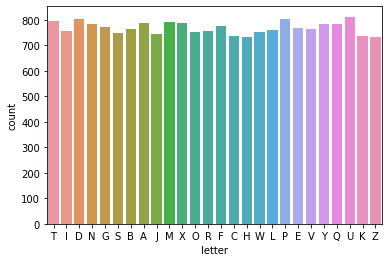

In [65]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KernelDensity
from scipy import stats
import matplotlib.patches as patches
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import datasets
def readfile():
  letters = pd.read_csv("/content/letter-recognition.csv")
  return letters
def printhead(letters):
  letters.head()
  return
def plotcountvslett(letters):
  sns.countplot(x=letters['letter'])
  return


letters=readfile()
printhead(letters)
plotcountvslett(letters)

print("OCSVM on letter recogition dataset\n")
printhead(letters)
letters_A=letters[letters['letter']=='A']
print(letters_A.head())
letters_A['letter']=1

print("additional 2% noise \n")
noise_2percent=letters[letters['letter']!='A'].sample(n=int(0.02*len(letters_A)))
noise_2percent['letter']=-1
print(noise_2percent)

letters_A_with_noise=pd.concat([letters_A,noise_2percent])
letters_A_with_noise

X=letters_A_with_noise.drop('letter',axis=1)
y=letters_A_with_noise['letter']


accuracy_score
0.9751243781094527


precision_score
0.98856416772554


recall_score
0.9860583016476553


confusion_matrix
[[  6   9]
 [ 11 778]]


target odf irsis data





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


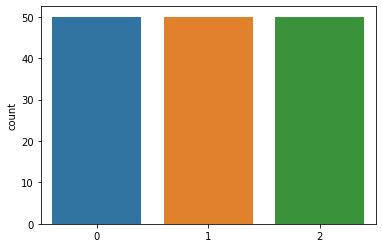

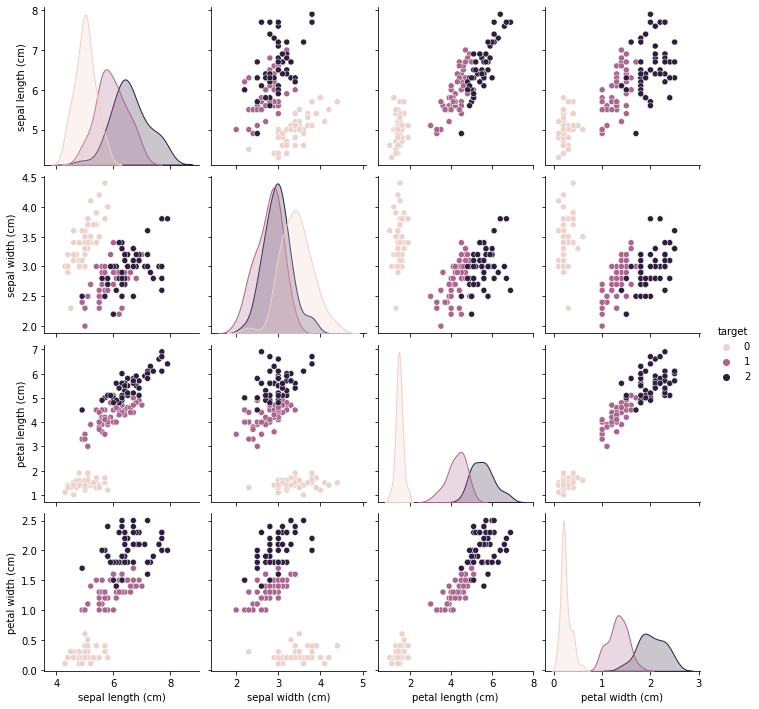

In [66]:
#OCSVM on letter recogition dataset
ocsvm=OneClassSVM(nu=0.02)
ocsvm.fit(X)
ocsvm.predict(X)
print("accuracy_score")
print(accuracy_score(y,ocsvm.predict(X)))
print("\n")
print("precision_score")
print(precision_score(y,ocsvm.predict(X)))
print("\n")
print("recall_score")
print(recall_score(y,ocsvm.predict(X)))
print("\n")
print("confusion_matrix")
print(confusion_matrix(y,ocsvm.predict(X)))

#Isolation Forest on letter recogition dataset
from sklearn.ensemble import IsolationForest
iforest=IsolationForest(contamination=0.02)
iforest.fit(X)
y_pred=iforest.predict(X)

#OCSVM on Iris Dataset
iris=datasets.load_iris()
iris_features=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_classes=pd.DataFrame(iris.target,columns=['target'])
iris_df=pd.concat([iris_features,iris_classes],axis=1)
iris_df.head()
print("\n")
print("target odf irsis data\n")
sns.countplot(iris.target)
print("\n")
sns.pairplot(iris_df,hue='target')
#Adding 2% noise in iris dataset
iris_0class=iris_df[iris_df['target']==0]
iris_0class['target']=1

noise_2percent=iris_df[iris_df['target']!=0].sample(n=int(0.02*len(iris_0class)))
noise_2percent['target']=-1
noise_2percent
iris_with_noise=pd.concat([iris_0class,noise_2percent])
iris_with_noise

X=iris_with_noise.drop('target',axis=1)
y=iris_with_noise['target']

predict
[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1]


accuracy_score
0.9411764705882353


OC-Tree on Letter Recognition


OC Tree on Iris Dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


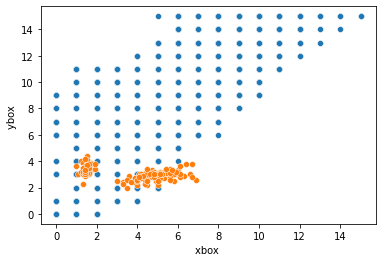

In [67]:
#svm2 on oneclasssvm
svm2=OneClassSVM(nu=0.02)
svm2.fit(X)
print("predict")
print(svm2.predict(X))
print("\n")
print("accuracy_score")
print(accuracy_score(y,svm2.predict(X)))
print("\n")


print("OC-Tree on Letter Recognition")
attributes=letters[['xbox ','ybox ']]
sns.scatterplot(x=letters['xbox '],y=letters['ybox '])
print("\n")
print("OC Tree on Iris Dataset")
sns.scatterplot(iris_df['petal length (cm)'],iris_df['sepal width (cm)'])





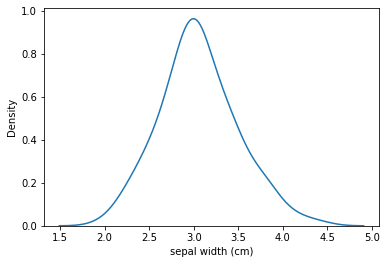

In [68]:
sns.kdeplot(iris_df['sepal width (cm)'],bw_method='silverman')

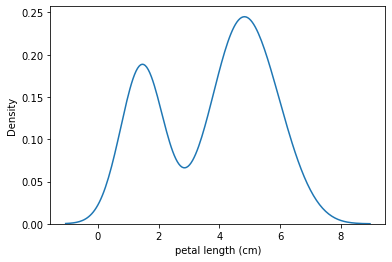

In [69]:
sns.kdeplot(iris_df['petal length (cm)'],bw_method='silverman')


In [94]:
def find_kde(arr):
  kde=stats.gaussian_kde(arr,bw_method='silverman')
  mn=np.min(arr)
  mx=np.max(arr)
  x=np.linspace(mn,mx,len(arr)*2)
  kde_values=kde(x)
  # plt.plot(x,kde_values)
  return x,kde_values

def find_modals(samples):
  modals=0
  for i in range(1,len(samples)-1):
    if samples[i]>samples[i-1] and samples[i]>samples[i+1]:
      print(samples[i-1],samples[i],samples[i+1])
      modals+=1
  return modals

def clipKDE(x,kde,gamma):
  mx=np.max(kde)
  threshold=gamma*mx
  # print('threshold:' +str(threshold))
  clipped_x=[]
  clipped_kde=[]
  for i in range(len(x)):
    if kde[i]>=threshold:
      clipped_x.append(x[i])
      clipped_kde.append(kde[i])
  plt.plot(clipped_x,clipped_kde)
  # plt.show()
  # print(len(x))
  # print(len(clipped_x))
  return clipped_x,clipped_kde

def find_min(alpha,x,samples):
  minima=0
  minima_idx=[]
  final_minima_idx=[]
  for i in range(1,len(samples)-1):
    if samples[i]<samples[i-1] and samples[i]<samples[i+1] and x[i]-x[i-1]<0.1 and x[i+1]-x[i]<0.1:
      minima+=1
      minima_idx.append(i)
  if minima>0:
    maxima=[]
    for i in range(1,len(samples)-1):
      if samples[i]>samples[i-1] and samples[i]>samples[i+1]:
        maxima.append(samples[i])
    idx=0
    for i in range(len(maxima)-1):
      # print(samples[minima_idx[idx]])
      # print(maxima[i],maxima[i+1])
      if samples[minima_idx[idx]]<=alpha*min(maxima[i],maxima[i+1]):
        final_minima_idx.append(minima_idx[idx])
      idx+=1
  # print(x[final_minima_idx[0]])
  return final_minima_idx


def split_into_segments(alpha,clipped_x,clipped_kde):
  segments=[]
  minima_idx=find_min(alpha,clipped_x,clipped_kde)
  if len(minima_idx)>0:
    segment=[]
    segment.append(0)
    for idx in minima_idx:
      segment.append(idx-1)
      segments.append(segment)
      segment=[]
      segment.append(idx+1)
    segment.append(len(clipped_x)-1)
    segments.append(segment)
  else:
    segment=[]
    segment.append(0)
    segment.append(len(clipped_x)-1)
    segments.append(segment)
  return segments


def assessment(beta,segments,train_len,x,attribute):
  # attribute numpy array
  shrinked_segments=[]
  for segment in segments:
    lo=x[segment[0]]
    hi=x[segment[1]]
    # print(lo)
    # print(hi)
    count_train=0
    for val in attribute:
      if val>=lo and val<=hi:
        count_train+=1
    # print(count_train)
    if count_train>=beta*train_len:
      shrinked_segments.append(segment)
  return shrinked_segments

def segments_from_idx(x,segments_idx):
  segments=[]
  for segment_idx in segments_idx:
    segment=[]
    segment.append(x[segment_idx[0]])
    segment.append(x[segment_idx[1]])
    segments.append(segment)
  return segments
def draw_rectangle(segments):

def train_samples_in_segment(segment,attribute):
  lo=segment[0]
  hi=segment[1]
  return attribute.between(lo,hi)

def estimate_attribute_split(segments,attribute):
  initial_segment_len=attribute.max()-attribute.min()
  # print(initial_segment_len)
  ig=0.0
  nt=len(attribute)
  nt_dash=nt
  for segment in segments:
    xti=train_samples_in_segment(segment,attribute)
    nti=len(xti)
    # print(nti)
    segment_len=segment[1]-segment[0]
    # print(segment_len)
    nti_dash=nt_dash*(segment_len/initial_segment_len)
    # print(nti_dash)
    # print((nti*nti_dash)/(nti+nti_dash))
    ig+=(nti*nti_dash)/(nti+nti_dash)
  return ig

def create_initial_segments(data):
  tree_segments={}
  for col in data.columns:
    segment=[]
    tree_segments[col]=[]
    segment.append(data[col].min())
    segment.append(data[col].max())
    tree_segments[col].append(segment)
  return tree_segments

In [103]:
#division on iris and letters data
x_petal_len,kde_petal_len=find_kde(iris_df['petal length (cm)'])
x_sepal_wid,kde_sepal_wid=find_kde(iris_df['sepal width (cm)'])
print(find_modals(kde_petal_len))
print(find_modals(kde_sepal_wid))






0.18870941908564784 0.18875003150108435 0.1886483384746968
0.2449669102609394 0.24499785187066475 0.24494948215940401
2
0.9642070115920538 0.9647526255889107 0.9646223471377192
1


In [104]:
x_height,kde_height=find_kde(letters['height'])


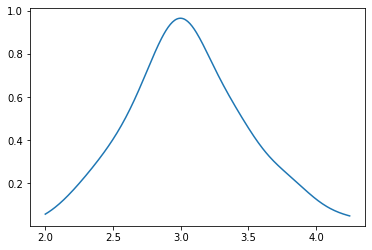

In [105]:
clipped_x_sepal_wid,clipped_kde_sepal_wid=clipKDE(x_sepal_wid,kde_sepal_wid,0.05)

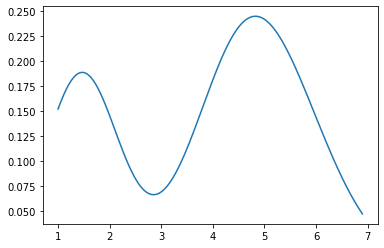

In [96]:
clipped_x_petal_len,clipped_kde_petal_len=clipKDE(x_petal_len,kde_petal_len,0.05)


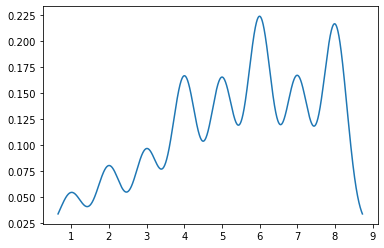

In [107]:
clipped_x_height,clipped_kde_height=clipKDE(x_height,kde_height,0.15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


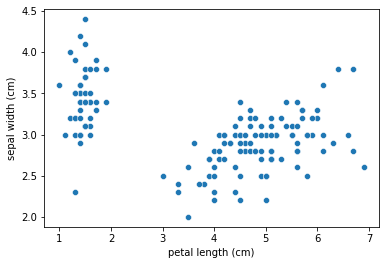

In [98]:

sns.scatterplot(iris_df['petal length (cm)'],iris_df['sepal width (cm)'],data=iris_df)




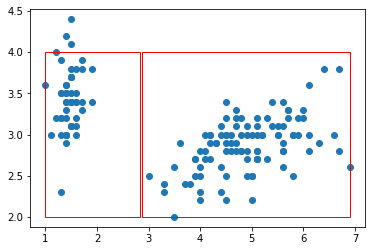

In [99]:

fig,axes=plt.subplots(1,1)
rect1 = patches.Rectangle((1, 2), 1.835, 2, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((2.874581939799331, 2), 6.9-2.874581939799331, 2, linewidth=1, edgecolor='r', facecolor='none')

axes.add_patch(rect1)
axes.add_patch(rect2)
axes.scatter(iris_df['petal length (cm)'],iris_df['sepal width (cm)'])


#Final Code(Decision Tree building)

In [78]:
initial_segments=create_initial_segments(iris_df[['petal length (cm)','sepal width (cm)']])

In [79]:
data=iris_df[['petal length (cm)','sepal width (cm)']]
